<a href="https://colab.research.google.com/github/Rickymuhindo/Rickymuhindo/blob/main/datacleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
1*3

3

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import nltk
import re


In [ ]:
matplotlib inline

In [ ]:
!data/sales_data.csv

/bin/bash: data/sales_data.csv: No such file or directory


In [ ]:
df = pd.read_csv("/home/ricky/jupyter_dir/Cell_Phones_and_Accessories_5.csv")

/home/ricky/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3257: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [ ]:
print(df.head())

   overall  verified   reviewTime      reviewerID        asin  \
0        5      True   08 4, 2014  A24E3SXTC62LJI  7508492919   
1        5      True  02 12, 2014  A269FLZCB4GIPV  7508492919   
2        3      True   02 8, 2014   AB6CHQWHZW4TV  7508492919   
3        2      True   02 4, 2014   A1M117A53LEI8  7508492919   
4        4      True   02 3, 2014  A272DUT8M88ZS8  7508492919   

                  style      reviewerName  \
0  {'Color:': ' Bling'}  Claudia Valdivia   
1                   NaN       sarah ponce   
2                   NaN               Kai   
3                   NaN   Sharon Williams   
4                   NaN   Bella Rodriguez   

                                          reviewText  \
0  Looks even better in person. Be careful to not...   
1  When you don't want to spend a whole lot of ca...   
2  so the case came on time, i love the design. I...   
3  DON'T CARE FOR IT.  GAVE IT AS A GIFT AND THEY...   
4  I liked it because it was cute, but the studs ...   

 

In [ ]:
df.shape

(1128437, 12)

In [ ]:
df.info

<bound method DataFrame.info of          overall  verified   reviewTime      reviewerID        asin  \
0              5      True   08 4, 2014  A24E3SXTC62LJI  7508492919   
1              5      True  02 12, 2014  A269FLZCB4GIPV  7508492919   
2              3      True   02 8, 2014   AB6CHQWHZW4TV  7508492919   
3              2      True   02 4, 2014   A1M117A53LEI8  7508492919   
4              4      True   02 3, 2014  A272DUT8M88ZS8  7508492919   
...          ...       ...          ...             ...         ...   
1128432        4      True  12 22, 2016  A1QWMCG1FNEP3A  B01HJC7N4C   
1128433        5     False  07 15, 2016  A3FOBEJ9UVUTR3  B01HJC7N4C   
1128434        5     False  07 14, 2016   AMUEAMKB4E33M  B01HJC7N4C   
1128435        5     False  07 13, 2016  A2EV91MMOJ3IL4  B01HJC7N4C   
1128436        5      True  05 11, 2017   ARKQD9Z1VPOV2  B01HJH9IN6   

                        style      reviewerName  \
0        {'Color:': ' Bling'}  Claudia Valdivia   
1            

In [ ]:
df.head(5)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5,True,"08 4, 2014",A24E3SXTC62LJI,7508492919,{'Color:': ' Bling'},Claudia Valdivia,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,1407110400,NaN,NaN
1,5,True,"02 12, 2014",A269FLZCB4GIPV,7508492919,NaN,sarah ponce,When you don't want to spend a whole lot of ca...,1,1392163200,NaN,NaN
2,3,True,"02 8, 2014",AB6CHQWHZW4TV,7508492919,NaN,Kai,"so the case came on time, i love the design. I...",Its okay,1391817600,NaN,NaN
3,2,True,"02 4, 2014",A1M117A53LEI8,7508492919,NaN,Sharon Williams,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY...,CASE,1391472000,NaN,NaN
4,4,True,"02 3, 2014",A272DUT8M88ZS8,7508492919,NaN,Bella Rodriguez,"I liked it because it was cute, but the studs ...",Cute!,1391385600,NaN,NaN


In [ ]:
df.describe

<bound method NDFrame.describe of          overall  verified   reviewTime      reviewerID        asin  \
0              5      True   08 4, 2014  A24E3SXTC62LJI  7508492919   
1              5      True  02 12, 2014  A269FLZCB4GIPV  7508492919   
2              3      True   02 8, 2014   AB6CHQWHZW4TV  7508492919   
3              2      True   02 4, 2014   A1M117A53LEI8  7508492919   
4              4      True   02 3, 2014  A272DUT8M88ZS8  7508492919   
...          ...       ...          ...             ...         ...   
1128432        4      True  12 22, 2016  A1QWMCG1FNEP3A  B01HJC7N4C   
1128433        5     False  07 15, 2016  A3FOBEJ9UVUTR3  B01HJC7N4C   
1128434        5     False  07 14, 2016   AMUEAMKB4E33M  B01HJC7N4C   
1128435        5     False  07 13, 2016  A2EV91MMOJ3IL4  B01HJC7N4C   
1128436        5      True  05 11, 2017   ARKQD9Z1VPOV2  B01HJH9IN6   

                        style      reviewerName  \
0        {'Color:': ' Bling'}  Claudia Valdivia   
1          

In [ ]:
categorical = df.dtypes[df.dtypes == "object"].index
print(categorical)
df[categorical].describe

Index(['reviewTime', 'reviewerID', 'asin', 'style', 'reviewerName',
       'reviewText', 'summary', 'vote', 'image'],
      dtype='object')


<bound method NDFrame.describe of           reviewTime      reviewerID        asin                 style  \
0         08 4, 2014  A24E3SXTC62LJI  7508492919  {'Color:': ' Bling'}   
1        02 12, 2014  A269FLZCB4GIPV  7508492919                   NaN   
2         02 8, 2014   AB6CHQWHZW4TV  7508492919                   NaN   
3         02 4, 2014   A1M117A53LEI8  7508492919                   NaN   
4         02 3, 2014  A272DUT8M88ZS8  7508492919                   NaN   
...              ...             ...         ...                   ...   
1128432  12 22, 2016  A1QWMCG1FNEP3A  B01HJC7N4C                   NaN   
1128433  07 15, 2016  A3FOBEJ9UVUTR3  B01HJC7N4C                   NaN   
1128434  07 14, 2016   AMUEAMKB4E33M  B01HJC7N4C                   NaN   
1128435  07 13, 2016  A2EV91MMOJ3IL4  B01HJC7N4C                   NaN   
1128436  05 11, 2017   ARKQD9Z1VPOV2  B01HJH9IN6                   NaN   

             reviewerName                                         reviewText 

In [ ]:
df["reviewText"][0:15]

0     Looks even better in person. Be careful to not...
1     When you don't want to spend a whole lot of ca...
2     so the case came on time, i love the design. I...
3     DON'T CARE FOR IT.  GAVE IT AS A GIFT AND THEY...
4     I liked it because it was cute, but the studs ...
5     The product looked exactly like the picture an...
6     I FINALLY got my case today. It took forever t...
7     It is a very cute case. None of the jewels hav...
8     DO NOT BUY! this item is seriously cheap as he...
9     I really love this case... you have to keep yo...
10    its super cute and makes my phone pretting and...
11    Another great product that my daughter she use...
12    Very cheap broke the first time we put it on :...
13    I purchased this for my grand-daughters phone....
14    Beautiful quality and outstanding product! Eve...
Name: reviewText, dtype: object

In [ ]:
df["overall"].describe

<bound method NDFrame.describe of 0          5
1          5
2          3
3          2
4          4
          ..
1128432    4
1128433    5
1128434    5
1128435    5
1128436    5
Name: overall, Length: 1128437, dtype: int64>

In [ ]:
df["overall"].unique

<bound method Series.unique of 0          5
1          5
2          3
3          2
4          4
          ..
1128432    4
1128433    5
1128434    5
1128435    5
1128436    5
Name: overall, Length: 1128437, dtype: int64>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fea48b0e970>]],
      dtype=object)

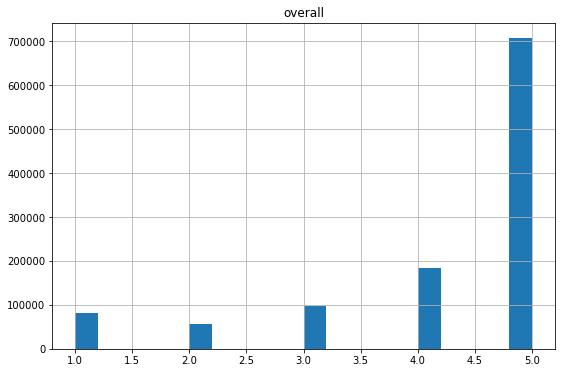

In [ ]:
import matplotlib.pyplot as plt
df.hist(column='overall',
        figsize=(9,6),
        bins=20)

In [ ]:
df=df[["overall","verified","reviewText"]]

In [ ]:
df=df.dropna()
df = df.reset_index(drop=True)
df

,overall,verified,reviewText
0,5,True,Looks even better in person. Be careful to not...
1,5,True,When you don't want to spend a whole lot of ca...
2,3,True,"so the case came on time, i love the design. I..."
3,2,True,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY...
4,4,True,"I liked it because it was cute, but the studs ..."
...,...,...,...
1127664,4,True,Good for viewing. But doesn't have a button or...
1127665,5,False,I was given the Rockrok 3D VR Glasses Headset ...
1127666,5,False,Super Fun! The RockRoc 3d vr headset is waaaay...
1127667,5,False,Love it!\n\nI've had other VR glasses which al...


In [ ]:
df = df[df['verified'] == True]

In [ ]:
print(df)

         overall  verified                                         reviewText
0              5      True  Looks even better in person. Be careful to not...
1              5      True  When you don't want to spend a whole lot of ca...
2              3      True  so the case came on time, i love the design. I...
3              2      True  DON'T CARE FOR IT.  GAVE IT AS A GIFT AND THEY...
4              4      True  I liked it because it was cute, but the studs ...
...          ...       ...                                                ...
1127661        4      True  Very good cell phone holster.  Keeps my phone ...
1127662        1      True  Mediocre case protection. Clip is junk. Broke/...
1127663        3      True   my sons likes it. For the price it isn't too bad
1127664        4      True  Good for viewing. But doesn't have a button or...
1127668        5      True                                          i love it

[986586 rows x 3 columns]


In [ ]:
df["verified"].unique

<bound method Series.unique of 0          True
1          True
2          True
3          True
4          True
           ... 
1127661    True
1127662    True
1127663    True
1127664    True
1127668    True
Name: verified, Length: 986586, dtype: bool>

In [ ]:
df=df[["overall","reviewText"]]

In [ ]:
print(df)

         overall                                         reviewText
0              5  Looks even better in person. Be careful to not...
1              5  When you don't want to spend a whole lot of ca...
2              3  so the case came on time, i love the design. I...
3              2  DON'T CARE FOR IT.  GAVE IT AS A GIFT AND THEY...
4              4  I liked it because it was cute, but the studs ...
...          ...                                                ...
1127661        4  Very good cell phone holster.  Keeps my phone ...
1127662        1  Mediocre case protection. Clip is junk. Broke/...
1127663        3   my sons likes it. For the price it isn't too bad
1127664        4  Good for viewing. But doesn't have a button or...
1127668        5                                          i love it

[986586 rows x 2 columns]


In [ ]:
df["overall"].describe

<bound method NDFrame.describe of 0          5
1          5
2          3
3          2
4          4
          ..
1127661    4
1127662    1
1127663    3
1127664    4
1127668    5
Name: overall, Length: 986586, dtype: int64>

In [ ]:
df["overall"]=df["overall"].astype(int)

In [ ]:
df=df[df["overall"]!=3]
df["label"]=np.where(df["overall"]>=4,1,0)

In [ ]:
print(df)

         overall                                         reviewText  label
0              5  Looks even better in person. Be careful to not...      1
1              5  When you don't want to spend a whole lot of ca...      1
3              2  DON'T CARE FOR IT.  GAVE IT AS A GIFT AND THEY...      0
4              4  I liked it because it was cute, but the studs ...      1
5              2  The product looked exactly like the picture an...      0
...          ...                                                ...    ...
1127660        5  Wouldn't be able to live without it. Strong ma...      1
1127661        4  Very good cell phone holster.  Keeps my phone ...      1
1127662        1  Mediocre case protection. Clip is junk. Broke/...      0
1127664        4  Good for viewing. But doesn't have a button or...      1
1127668        5                                          i love it      1

[898687 rows x 3 columns]


In [ ]:
df["overall"].unique

<bound method Series.unique of 0          5
1          5
3          2
4          4
5          2
          ..
1127660    5
1127661    4
1127662    1
1127664    4
1127668    5
Name: overall, Length: 898687, dtype: int64>

In [ ]:
df["overall"].value_counts()

5    615664
4    157812
1     73755
2     51456
Name: overall, dtype: int64

In [ ]:
df["reviewText"] = df["reviewText"].str.lower()

In [ ]:
print(df)

         overall                                         reviewText  label
0              5  looks even better in person. be careful to not...      1
1              5  when you don't want to spend a whole lot of ca...      1
3              2  don't care for it.  gave it as a gift and they...      0
4              4  i liked it because it was cute, but the studs ...      1
5              2  the product looked exactly like the picture an...      0
...          ...                                                ...    ...
1127660        5  wouldn't be able to live without it. strong ma...      1
1127661        4  very good cell phone holster.  keeps my phone ...      1
1127662        1  mediocre case protection. clip is junk. broke/...      0
1127664        4  good for viewing. but doesn't have a button or...      1
1127668        5                                          i love it      1

[898687 rows x 3 columns]
